# Lecture 6: Classification
In data science, it is essential to distinguish the type of problems we are solving for. So far in this course, we have learned some **regression** techniques such as linear regressions, and **classifiers** such as logistic regressions and decision trees. In this lecture we are exploring more methods to solve **classification** problems.

## K Nearest Neighbors
One of the simplest classification models is called **K Nearest Neighbors**, or kNN. In kNN, the prediction is made based on a majority vote amoung its neighbors, increasing the searching radius around the point until the number of neighbors sums up to k. As such, k tends to be a small integer, and often an odd number in order to be a *tie-breaker*. For example, if you implement kNN classifer with k-value of 3, the classifier will keep searching the neighbors around the prediction point until finding 3 neighbors. While kNN is very easy to interpret, it is called an **instance-based learning** or **lazy learning** since the algorithm is only applied locally and not all detasets are used for the prediction. In the "training phase" of a kNN classifier, it simply stores all data points and their categories. 

![image](https://mayuresha.files.wordpress.com/2013/04/knn.jpg)

### K-value Selection
Using the "right" k-value will significantly affect the output of the classifier. If you choose larger k-value, the model will become more robust to small noises; however, the boundary line between 2 classes will be less distinct. Intuitively, with the larger k-value, the borderline between classes becomes smoother while the smaller k-value will have a potential problem of over-fitting. For example, when k is 1, the closest neighbor in train data becomes the point itself. Thus, the accuracy of this model on training dataset will be 100%. However, this model simply predicts a datapoint to be the identical class with its closest neighbor. This method is only usuful for the initial analysis of data or classification of very large datasets.

Smaller k value will increase **variance** in the outputs but tends to **overfit** the classifier. On the other hands, larger k value will increase **bias** while becoming more robust to the outliers. (Continued in lecture 8)


<img src = "https://www.analyticsvidhya.com/wp-content/uploads/2014/10/K-judgement.png" width = 500/>
<img src = "https://www.analyticsvidhya.com/wp-content/uploads/2014/10/K-judgement2.png" width = 500/>


### Weighted Nearest Classifier
Intuitively speaking, if the point to predict is located very closely to some class *A*, it is very likely to belong to A. On the other hand, the confidence level decreases as the distance from the closest point increases. The algorithm to apply this "intuition" is called **weighted nearest classifier**. This model simply improves the normal kNN classifier by calcurating the weighted sum of neighbors as it multiples by 1/d where d is the distance from the center. This will account for the fact that the distance from the point and the confidence level of prediction is in the negative correlation. 

### kNN in R
Before using R to craete classification models, we need to prepare a dataset that contains 2 classes. The following code will teach you how to create 100 data points with three values, x coordinate, y-coordinate, and class (-1 or 1).

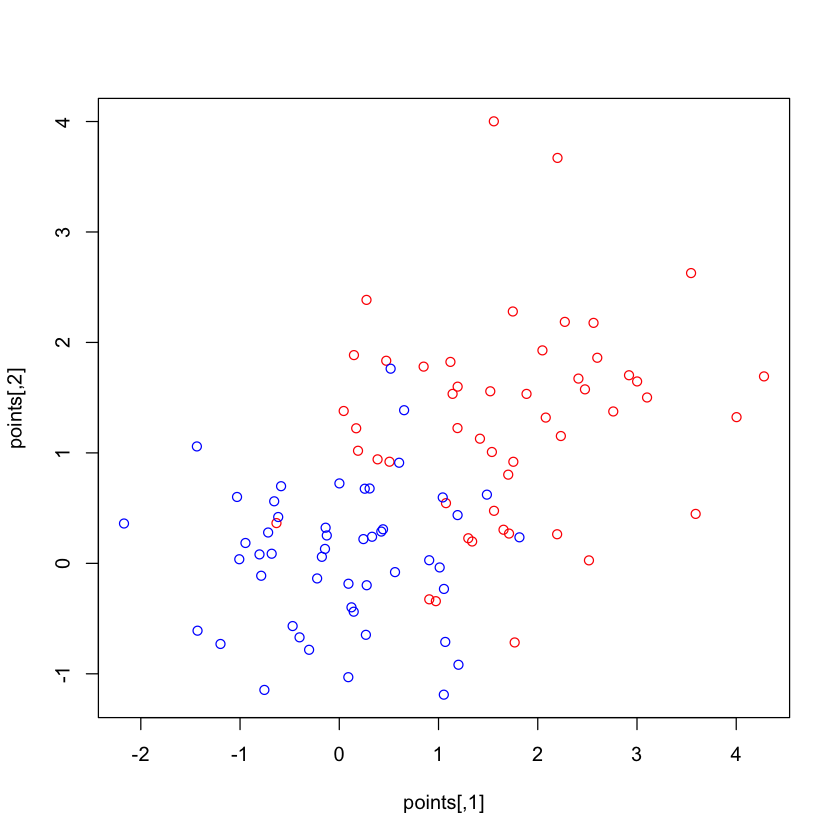

In [5]:
# Set up parameters
meanA <- 1.5 # mean for class A
meanB <- 0 # mean for class B
sdA <- 1 # standard deviation for A
sdB <- 0.7 # standard deviation for B

# Create 100 random points and store them into 50 x 2 matrix
matA <- matrix(data = rnorm(n = 100, mean = meanA, sd = sdA), nrow = 50, ncol = 2)
matB <- matrix(data = rnorm(n = 100, mean = meanB, sd = sdB), nrow = 50, ncol = 2)

# Combine 2 matrix 
points <- rbind(matA, matB)

# Label A as 1, B as -1
labels <- matrix(c(rep(1, 50), rep(-1,50)))

# Now plot class A as a red point, B as a blue point
plot(points, col = ifelse(labels > 0, 2, 4))

Now that we have a dataset, we are going to split it into train data and test data.
In this case, we are simply sampling 70 data points as a train data and use the rest as a test data.

In [6]:
# Splitting dataset into a train set and a test set
sample_index <- sample(100,70) # randomly pick 70 indecies

train_data <- points[sample_index,]
test_data <- points[-sample_index,]
train_label <- labels[sample_index,]
test_label <- labels[-sample_index,]

Finally, let's use knn function from *class* library.
We are creating 4 classifiers with diffrent k values. 

In [7]:
# Import class library
library(class)

# kNN Classifier with k = 1
classifier_1 <- knn(train = train_data, test = test_data, cl = train_label, k = 1)
# kNN Classifier with k = 3
classifier_3 <- knn(train = train_data, test = test_data, cl = train_label, k = 3)
# kNN Classifier with k = 5
classifier_5 <- knn(train = train_data, test = test_data, cl = train_label, k = 5)
# kNN Classifier with k = 7
classifier_7 <- knn(train = train_data, test = test_data, cl = train_label, k = 7)

# Here is a simple way to check accuracy
sum(classifier_1 == test_label) / 30
sum(classifier_3 == test_label) / 30
sum(classifier_5 == test_label) / 30
sum(classifier_7 == test_label) / 30

[1] 0.9333333

[1] 0.8333333

[1] 0.8666667

[1] 0.9

We can also see the result using *table* function.

In [8]:
table(test_label, classifier_1)
table(test_label, classifier_3)
table(test_label, classifier_5)
table(test_label, classifier_7)

          classifier_1
test_label -1  1
        -1 14  1
        1   1 14

          classifier_3
test_label -1  1
        -1 11  4
        1   1 14

          classifier_5
test_label -1  1
        -1 12  3
        1   1 14

          classifier_7
test_label -1  1
        -1 13  2
        1   1 14

(Conclusion) or should I implement kknn (weighted kNN)?

## Naive Bayes
Our second classifier is called a naive Bayes classifier. This classifier applies Bayes' theorem with an assumption that all parameters are independent. 

### Bayes' Theorem (Quick Stats Review)
Bayes' Theorem is a fundamental equation to solve for conditional probabilities. Conditional probability is a probability of some event *A* when you have literally a condition *B*. For example, when you want to find the probabilty of eating out at the college town (an event A), but with the condition that it is a final week (an event B). Probability of eating out on any random day, P(A), is probably low if you are a college student. However, the probability will most likely raise if it is a random day during the final week, because students don't have time to cook. The second analogy represents the conditional probability of A given B and the mathmatical notation is $P(A|B)$.

Bayes' Theorem shows the mathmatical relationship of those conditional probabilities and it is represented as follows:

$$P(A|B) = \frac{P(B|A)\times P(A)}{P(B)}$$

### Independence (Quick Stats Review 2)
By definition, two events are called independent if the occurance of one event has no effect on the probability of other event.
If 2 events are independent, you can show the mathmatical relationship by the following equation:

$$P(A\cap B) = P(A)\times P(B)$$

This assumption will make the calculation of naive Bayes significatly easier.

### Naive Bayes
Let's imagine we want to identify the gender of a randomly selected person given his or hers social media profile (of course the gender information is missing!). We have many feature parameters such as name, picture, where this person is from, high school, favorite music they listen to, liked posts, shared events etc. Naive bayes will calcurate the probability of this particular individual being male given those parameters and compare it with the probability of this individual being female given the parameters. If the probability of male is higher than female, the classifier predicts this person to be male.

Let's say we have n feature variables and call them $X_1, X_2, X_3, ... , X_n$. Also we define the probability of a person being male as P(M), and female as P(F).

Naive Bayes will compare $P(M|X)$ and $P(F|X)$.

From Bayes' Theorem, we can state following relationship.

$$P(M|X) = \frac{P(X|M)\times P(M)}{P(X)} = \frac{P(X_1\cap X_2\cap... X_n|M)\times P(M)}{P(X)}$$

By assuing all parameters are indepentent, we can also show following.

$$P(X_1\cap X_2\cap... X_n|M) = P(X_1|M)\times P(X_2|M)\times ... \times P(X_n|M)$$

So what does this mean? In this particular problem, naive Bayes classifier will look at the social media profile, and for each parameters it calculates the probability of being male or female. For example, if this person's name is Peter, how liktely is this person to be male? If this person listens to jazz a lot, how likely is this person to be male? etc. The result of such questions will be multiplied all together to find the probability of this individual being male.

There are several kinds of naive Bayes classifier based on how to deal with those questions. If the classifier assumes that the parameters are distributed *normally*, it is a **Gaussian Naive Bayes**. If the classifier assumes it is a bernoulli distribution, then it is a **Bernoulli Naive Bayes**. 

### Naive Bayes in R
In R, we use *naiveBayes* function from *e1071* library.

## SVM
Support Vector Machine is another classification method which is known for its memory friendly nature. In the lecture, we introduced Maximal Margin Classifier since the support vector machine is essentialy a generalization of maximal margin classifer in higher dimentions.

### Maximal Margin Classifier
Let's take a look at the plot we made for kNN classifier. In this graph, we have 2 classes, A and B, plotted with a red and blue point accordingly. Maximal margin classifer is a classifier to discover an optimal linear separation, called **hyperplane**, which divides different classes. In this situation, we are using 2 dimentional datasets and the hyperplane is a linear model. In general, in a p-dimensinal space, a hyperplane exists in a subspace of p-1 dimension. For example, in a three dimentional space, hyperplane is a 2 dimentional separation, in other words, a plane.

Let's look back to the plot from our example. 
In two dimensions, a hyperplane is represented by the equation

$$B_0 + B_1X_1 + B_2X_2= 0$$

You can distinguish two classes by wheather or not the equation outputs a negative value or positive value.
Margimal margin classifier is essentialy the process to find optimal coefficient values $B_0$, $B_1$ and $B_2$.

After finding some candidates for the optimal hyperplane, the classifier predicts new data point based on which side of the hyper plane the point locates. In some specific situations, maximal margin classifier is able to find a perfect linear borderline that divides 2 classes; however, it is very unlikely to have dataset where such a linear division exists. In this case, there will be some data points that locate on a "wrong" side of the borderline. 

The first step of optimizing a hyper plane is to minimize the amount of points which exist on the "wrong" side. To do this, we look at borderline cases, more specifically, the data points which exist near the hyperplane. These points are called **support vectors**.
 
### Support Vector Machines
We can think of Support Vector Machine as a generalized maximal margin classifier for cases where we cannot linearly separate classes. In this note, we are going to introduce the concpet of **soft margin** and **kernel trick**.

In most cases, datasets are not linearly separable. Even if it is separable, there are some cases that we intentianally not to choose such a separation for the **bias** and **sensitivity** trade-offs (Lecture 8). Let's look at specific case. The graph below shows the hyperplane between two classes, blue are red. As you can see the existance of one outlier drasticaly changes the hyperplane. In this case it is better to allow one outlier to fall on to the wrong side. **soft margin support vector machine**.
<img src = "http://yaroslavvb.com/upload/save/so-svm.png" width = 250/>

Mathmatical way to apply this is called a **cost function** and it is represented with $-log(1-\frac{1}{1+e^{cx}})$. It looks like an exponential function and the coefficient c will change how fast the value increases. This function dictates how much to penalize support vectors for being mislabled. If the penalty value is high, then svm is **hard margin**, while the penalty value is low it is **soft margin**. (This correlates with lecture 8 material)

### Non-linear Hyperplane - Kernel Trick 
Let's take a look at an example. In this scinario, we cannot separate 2 classes with a linear hyperplane. However obvious there is a clear pattern between 2 classes, which should be an oval shape.
<img src = "https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_8.png" width = 300/>
This problem is easily fixed by adding a new feature, z, by solving $x^2 + y^2$. Now the new x-z graph looks like this.
<img src = "https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_9.png" width = 300/>

This process is called a **kernel trick** or a **kernel method**. Support Vector Machine applies functions to transform lower dimentional data to higher dimentional data (in this case, x-y 2D data into x-y-z 3D data). This process is very important to find **non-linear hyperplane**. After transforming the data, we successfully found 
<img src = "https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_10.png" width = 300/>

#### Support Vector Regression
Even though we introduced Support Vector Machine as an example of classifier, you can also use support vector machine as a regression model. In this situation, you can use the hyporplane generated by SVM as a regression line. 

### SVM in R
In R, we use *svm* function from *e1071* library. This function looks at the data frame and automatically uses SVM as a classifier if you are training categorical values, and it uses as a regression if you are predicting a numeric value. 

In [9]:
# import library e1071
library("e1071")

# If you are using SVM as a classifier, you need to input non-numeric value to the function
svm.classifier <- svm(train_data, as.factor(train_label))

In [10]:
# Now test your SVM model with test_data
svm.prediction <- predict(svm.classifier, test_data)

# Check the accuracy
sum(svm.prediction == test_label) / 30

[1] 0.8666667

In [11]:
table(test_label, svm.prediction)

          svm.prediction
test_label -1  1
        -1 12  3
        1   1 14

Now let's take a look at the classifier model we found by using *summary* function.

In [12]:
summary(svm.classifier)


Call:
svm.default(x = train_data, y = as.factor(train_label))


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  36

 ( 18 18 )


Number of Classes:  2 

Levels: 
 -1 1




### Optimization

Under *Prameters* we see *cost* and *gamma*. These values are the parameters that we can optimize to improve the model. 

*cost* represents the parameter for the soft margin cost function. This function dictates how much they *penalize* support vectors for being mislabeled. The greater the cost value is, the smaller the margin will become. Intuitively, the classifier tends to overfit when c is too large, but the classifier will lose its prediction ability if it allows too many mislabled support vectors.

*gamma* represents the coefficient of nonlinear kernel function (outside of the scope of this lecture). 

$$F(x,y) = e^{(-\gamma |x-y|^2)}$$

Intuitively, a small gamma means that the difference between parameters will have larger infuluence in variance of the data. This will allow support vectors to have larger influence on classification while larger gamma value will limit the effect of support vectors. In this case, support vectors will have their influence locally.


*tune* function from *e1071* library will iteratively try the cost and gamma value within the range you define and give you the optimal parameter.

For this example, we are going to try cost from 0.1, 10, 100 and 1000, and gamma value of .5 to 2.

In [16]:
# Optimize SVM classifier
tune.svm(x = train_data, y = factor(train_label), cost = 10^(-1:3), gamma =c(.5:2))


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.5  0.1

- best performance: 0.07142857 


Look under the best parameters. Those values are the suggestions made by *tune* function. Now we can create new svm classifier with suggested values.

In [15]:
# Create new classifier with different parameters
tuned_svm_classifier <- svm(train_data, as.factor(train_label), cost = 0.1, gamma = 0.5)
tuned_prediction <- predict(tuned_svm_classifier, test_data)

# Check the accuracy
sum(tuned_prediction == test_label) / 30

[1] 0.8